# Principal Component Analysis (PCA)

#### PCA From Scratch (2D → 1D)

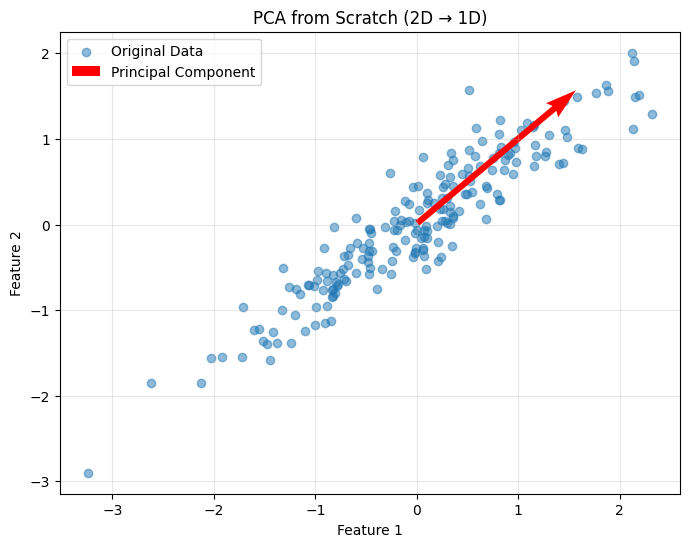

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Generate 2D data
np.random.seed(42)
X = np.random.randn(200, 2)
X[:,1] = 0.8 * X[:,0] + X[:,1] * 0.3 

# PCA from scratch

# 1) Center data
X_meaned = X - np.mean(X, axis=0)

# 2) Covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

# 3) Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 4) Sort by eigenvalue
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# 5) Select top 1 component
principal_component = eigenvectors[:, 0].reshape(2, 1)

# 6) Project data (2D → 1D)
X_reduced = X_meaned @ principal_component


# Visualization

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], alpha=0.5, label="Original Data")

origin = np.mean(X, axis=0)
pc_line = principal_component.flatten()

plt.quiver(
    origin[0], origin[1],
    pc_line[0], pc_line[1],
    scale=3, color="red", width=0.01,
    label="Principal Component"
)

plt.title("PCA from Scratch (2D → 1D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### PCA From Scratch (3D → 2D)

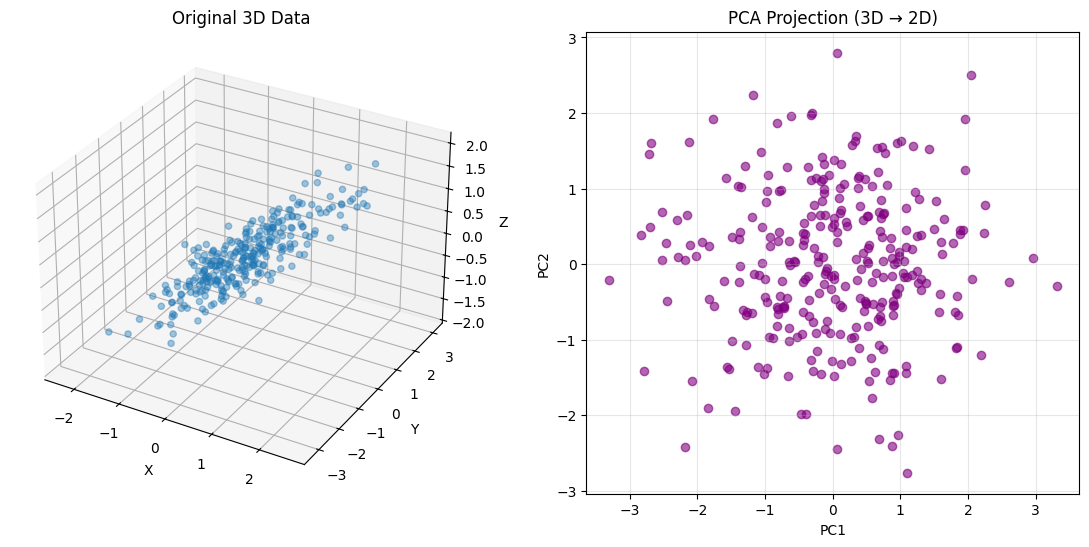

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


# Generate 3D data

np.random.seed(42)
X = np.random.randn(300, 3)
X[:,2] = X[:,0] * 0.7 + X[:,1] * 0.2 + np.random.randn(300) * 0.1


# PCA steps

X_meaned = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_meaned, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# Select top 2 components
W = eigenvectors[:, :2]

# Project data (3D → 2D)
X_reduced = X_meaned @ W


# Visualization

fig = plt.figure(figsize=(14,6))

# 3D plot
ax = fig.add_subplot(121, projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], alpha=0.4)
ax.set_title("Original 3D Data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 2D PCA projection
ax2 = fig.add_subplot(122)
ax2.scatter(X_reduced[:,0], X_reduced[:,1], alpha=0.6, color="purple")
ax2.set_title("PCA Projection (3D → 2D)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.grid(alpha=0.3)

plt.show()
